# Data Science Coding Test 

The test is designed to be completed in 4 hours, which is also the deadline. There are two problems to be completed, each with multiple parts. The main evaluation criteria are accuracy and completeness: please try to do as many tasks as possible within the allocated time. 

You can use either __R__ or __Python__ and you MUST deliver all the codes, accompanied by estimation results and graphs/tables required in this test in the format of your choice. You can leverage any packages that you find useful for the accomplishment of the test.

## Problem 1

Use file __“mortgages.csv”__ and __“macros.csv”__ for this exercise. The brief description of the variables are given in the table below. The two datasets have a panel and time-series structure, respectively.

__mortgages.csv__

Column | Type | Description
:---|:---|:---
`loan_id` | Numeric | The unique ID assigned to every loan application.
`time` | Numeric| Observation month in elapsed time format (# of months since 1960-Jan)
`obs_month` | Numeric | Observation month in YYYYMM format
`orig_date` | Date | Loan origination date
`orig_date_elapsed` | Numeric | Loan origination date in elapsed time format (# of months since 1960-Jan)
`maturity_date` | Date | Loan maturity date
`occupancy` | Categorical | Occupancy type of the collateral
`mortgage_type` | Categorical | Mortgage type
`arrears` | Numeric | Number of months a loan is in arrears
`current_balance` | Numeric | Current outstanding balance of the loan
`current_ltv` | Numeric | Current loan-to-value ratio
`credit_score` | Numeric | Origination credit score of the borrower
`original_ltv` | Numeric | Origination loan-to-value ratio (LTV)
`hpi_o` | Numeric | House price index at loan origination date
`interest_rate_o` | Numeric | Mortgage rate at loan origination date

__macros.csv__

Column | Type | Description
:---|:---|:---
`hpi_t` | Numeric | House price index at current date
`interest_rate_t` | Numeric | Mortgage rate at current date
`gdp_t` | Numeric | GDP annual growth rate at current date

1. __How many observations and how many loans (*loan_id*) are there in the dataset? What is the time coverage (start and end dates) in terms of observation month, origination date and the maturity date?__

In [1239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('mortgages.csv')
df.head()

,loan_id,time,obs_month,orig_date,orig_date_elapsed,maturity_date,occupancy,mortgage_type,arrears,current_balance,current_ltv,credit_score,original_ltv,hpi_o,interest_rate_o
0,1,675,201604,201308,643,202308,holiday home,NaN,0,41303.42,24.498336,715.0,69.4,87.03,9.2
1,1,676,201605,201308,643,202308,holiday home,bullet,0,41061.95,24.483867,715.0,69.4,87.03,9.2
2,1,677,201606,201308,643,202308,btl,erm,0,40804.42,24.626795,715.0,69.4,87.03,9.2
3,1,678,201607,201308,643,202308,btl,erm,0,40483.89,24.735883,715.0,69.4,87.03,9.2
4,1,679,201608,201308,643,202308,NaN,linear,0,40367.06,24.925476,715.0,69.4,87.03,9.2


In [1240]:
for x in ['obs_month', 'orig_date', 'maturity_date']:
    df[x] = pd.to_datetime(df[x], format='%Y%m')

df.head()

,loan_id,time,obs_month,orig_date,orig_date_elapsed,maturity_date,occupancy,mortgage_type,arrears,current_balance,current_ltv,credit_score,original_ltv,hpi_o,interest_rate_o
0,1,675,2016-04-01,2013-08-01,643,2023-08-01,holiday home,NaN,0,41303.42,24.498336,715.0,69.4,87.03,9.2
1,1,676,2016-05-01,2013-08-01,643,2023-08-01,holiday home,bullet,0,41061.95,24.483867,715.0,69.4,87.03,9.2
2,1,677,2016-06-01,2013-08-01,643,2023-08-01,btl,erm,0,40804.42,24.626795,715.0,69.4,87.03,9.2
3,1,678,2016-07-01,2013-08-01,643,2023-08-01,btl,erm,0,40483.89,24.735883,715.0,69.4,87.03,9.2
4,1,679,2016-08-01,2013-08-01,643,2023-08-01,NaN,linear,0,40367.06,24.925476,715.0,69.4,87.03,9.2


In [1241]:
df.isna().sum()

loan_id                 0
time                    0
obs_month               0
orig_date               0
orig_date_elapsed       0
maturity_date           0
occupancy            8179
mortgage_type        6118
arrears                 0
current_balance         0
current_ltv          1857
credit_score         3810
original_ltv            0
hpi_o                   0
interest_rate_o         0
dtype: int64

In [1242]:
print('Number of unique loans:')
print(df['loan_id'].unique().shape[0]) # Unique loan_id(s)
print()
print('Number of observations:')
print(df.shape[0]) # Number of observations
print()

# Print the min value of the obs_month, orig_date, maturity date
print('Min value of obs_month:')
print(df['obs_month'].min()) # Min value of obs_month
print()

print('Min value of orig_date:')
print(df['orig_date'].min()) # Min value of orig_date
print()

print('Min value of maturity_date:')
print(df['maturity_date'].min()) # Min value of maturity_date
print()

print('Max value of obs_month:')
print(df['obs_month'].max()) # Max value of obs_month
print()

print('Max value of orig_date:')
print(df['orig_date'].max()) # Max value of orig_date
print()

print('Max value of maturity_date:')
print(df['maturity_date'].max()) # Max value of maturity_date

Number of unique loans:
5000

Number of observations:
61583

Min value of obs_month:
2014-04-01 00:00:00

Min value of orig_date:
2010-11-01 00:00:00

Min value of maturity_date:
2015-11-01 00:00:00

Max value of obs_month:
2019-03-01 00:00:00

Max value of orig_date:
2019-02-01 00:00:00

Max value of maturity_date:
2033-04-01 00:00:00


2. __Create a table reporting the number of loans and percentage of loans per month. Create a distribution plot (bar plot) showing the number of loans at each observation date in the dataset.__

In [1243]:
df.head()

,loan_id,time,obs_month,orig_date,orig_date_elapsed,maturity_date,occupancy,mortgage_type,arrears,current_balance,current_ltv,credit_score,original_ltv,hpi_o,interest_rate_o
0,1,675,2016-04-01,2013-08-01,643,2023-08-01,holiday home,NaN,0,41303.42,24.498336,715.0,69.4,87.03,9.2
1,1,676,2016-05-01,2013-08-01,643,2023-08-01,holiday home,bullet,0,41061.95,24.483867,715.0,69.4,87.03,9.2
2,1,677,2016-06-01,2013-08-01,643,2023-08-01,btl,erm,0,40804.42,24.626795,715.0,69.4,87.03,9.2
3,1,678,2016-07-01,2013-08-01,643,2023-08-01,btl,erm,0,40483.89,24.735883,715.0,69.4,87.03,9.2
4,1,679,2016-08-01,2013-08-01,643,2023-08-01,NaN,linear,0,40367.06,24.925476,715.0,69.4,87.03,9.2


In [1244]:
# Extract month and year
df['month'] = df['obs_month'].dt.month
df['year'] = df['obs_month'].dt.year

# Group by month and calculate the number of loans per month
monthly_loans = df.groupby(['year', 'month']).size().reset_index(name='Number of Loans')

# Calculate the total loans per year for percentage calculation
total_loans_per_year = df.groupby('year').size()

# Calculate the percentage of loans per month and year
monthly_loans['Percentage of Loans (%)'] = (monthly_loans['Number of Loans'] / monthly_loans.apply(lambda row: total_loans_per_year[row['year']], axis=1)) * 100

# Display the table
print(monthly_loans)

    year  month  Number of Loans  Percentage of Loans (%)
0   2014      4               32                 4.900459
1   2014      5               60                 9.188361
2   2014      6               90                13.782542
3   2014      7               84                12.863706
4   2014      8               79                12.098009
5   2014      9               85                13.016845
6   2014     10               75                11.485452
7   2014     11               73                11.179173
8   2014     12               75                11.485452
9   2015      1               71                 1.634815
10  2015      2               80                 1.842045
11  2015      3              113                 2.601888
12  2015      4              118                 2.717016
13  2015      5              127                 2.924246
14  2015      6              126                 2.901220
15  2015      7              200                 4.605112
16  2015      

<Figure size 1000x600 with 0 Axes>

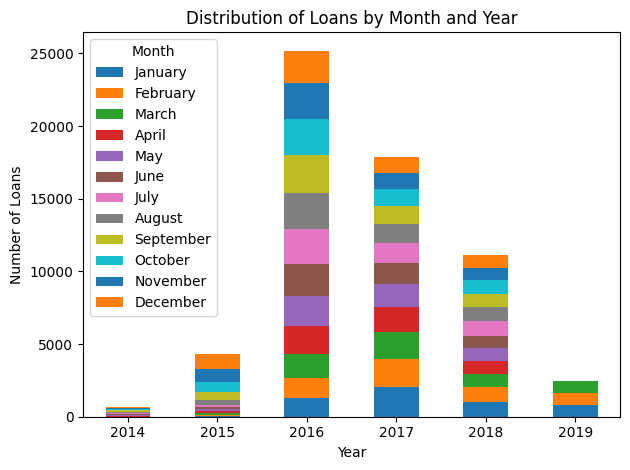

In [1245]:
# Define the month names for the x-axis labels
month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Create a pivot table for the monthly loans data
pivot_table = monthly_loans.pivot(index='year', columns='month', values='Number of Loans')

# Create a bar plot
plt.figure(figsize=(10, 6))
pivot_table.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Number of Loans')
plt.title('Distribution of Loans by Month and Year')
plt.xticks(rotation=0)
plt.legend(title='Month', labels=month_names)
plt.tight_layout()

# Show the plot
plt.show()

In [1246]:
# Group by month and calculate the number of loans per month
monthly_loans = df.groupby('month').size().reset_index(name='Number of Loans')

# Calculate the total loans for proportion calculation
total_loans = len(df)

# Calculate the proportion of loans per month
monthly_loans['Proportion of Loans (%)'] = (monthly_loans['Number of Loans'] / total_loans) * 100

# Display the table
print(monthly_loans)

    month  Number of Loans  Proportion of Loans (%)
0       1             5255                 8.533199
1       2             5232                 8.495851
2       3             5305                 8.614390
3       4             4727                 7.675820
4       5             4639                 7.532923
5       6             4733                 7.685563
6       7             5036                 8.177581
7       8             5141                 8.348083
8       9             5408                 8.781644
9      10             5410                 8.784892
10     11             5391                 8.754039
11     12             5306                 8.616014


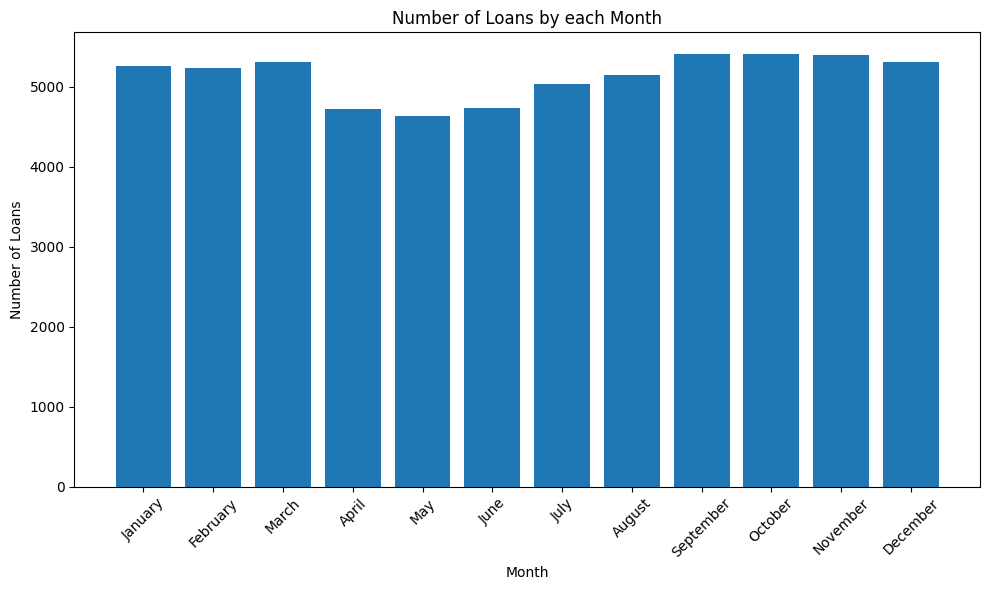

In [1247]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(monthly_loans['month'], monthly_loans['Number of Loans'])
plt.xlabel('Month')
plt.ylabel('Number of Loans')
plt.title('Number of Loans by each Month')
plt.xticks(monthly_loans['month'], month_names)  # Replace numeric ticks with month names
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

3. __Create a table reporting the number and share of observations per vintage (origination year) using the variable _orig_date_. Create a distribution plot (bar plot) showing the number of loans at each vintage in the dataset__

   origination_year  Number of Loans  Share of Loans (%)
0              2010               47            0.076320
1              2012              119            0.193235
2              2013             1215            1.972947
3              2014             2747            4.460647
4              2015            24062           39.072471
5              2016            33072           53.703132
6              2017               13            0.021110
7              2018              304            0.493643
8              2019                4            0.006495


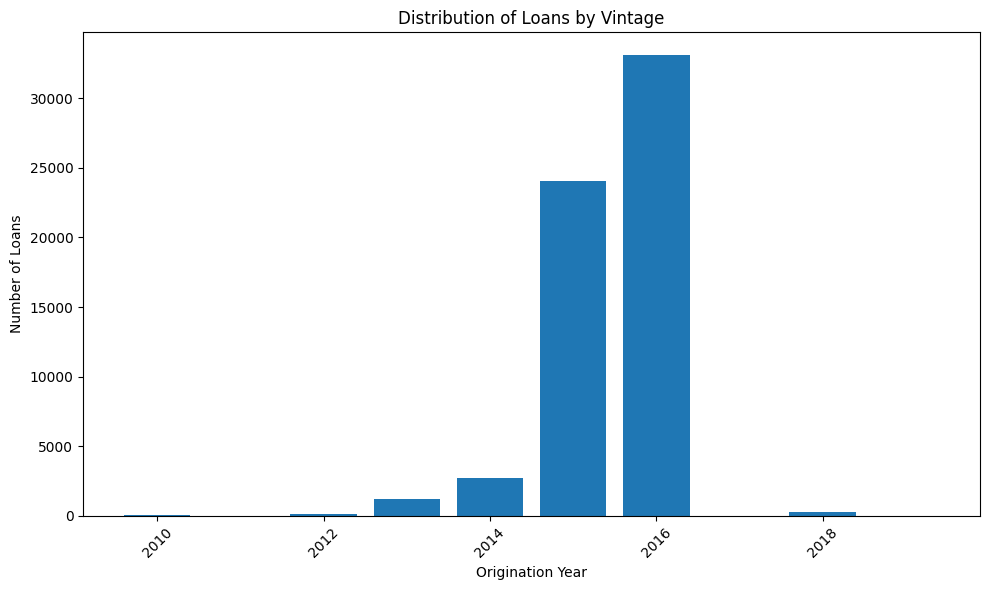

In [1248]:
# Extract origination year
df['origination_year'] = df['orig_date'].dt.year

# Group by origination year and calculate the number of loans per vintage
vintage_loans = df.groupby('origination_year').size().reset_index(name='Number of Loans')

# Calculate the total loans for percentage calculation
total_loans = len(df)

# Calculate the percentage of loans per vintage
vintage_loans['Share of Loans (%)'] = (vintage_loans['Number of Loans'] / total_loans) * 100

# Create a table
print(vintage_loans)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(vintage_loans['origination_year'], vintage_loans['Number of Loans'])
plt.xlabel('Origination Year')
plt.ylabel('Number of Loans')
plt.title('Distribution of Loans by Vintage')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

4. __Create a new variable called “*first_obs*” that is the first observation date of each account. Create and summarize the observation lag (difference between the origination date and the first observation date) in the dataset.__

In [1249]:
# Group by 'loan_id' and calculate the first observation date for each account
df['first_obs'] = df.groupby('loan_id')['obs_month'].transform('min')

# Calculate the observation lag (difference between 'orig_date' and 'first_obs')
df['obs_lag'] = (df['orig_date'] - df['first_obs']).dt.days

# Convert df['obs_lag'] to asbolute values
df['obs_lag'] = df['obs_lag'].abs()

df

,loan_id,time,obs_month,orig_date,orig_date_elapsed,maturity_date,occupancy,mortgage_type,arrears,current_balance,current_ltv,credit_score,original_ltv,hpi_o,interest_rate_o,month,year,origination_year,first_obs,obs_lag
0,1,675,2016-04-01,2013-08-01,643,2023-08-01,holiday home,NaN,0,41303.42,24.498336,715.0,69.4,87.03,9.20,4,2016,2013,2016-04-01,974
1,1,676,2016-05-01,2013-08-01,643,2023-08-01,holiday home,bullet,0,41061.95,24.483867,715.0,69.4,87.03,9.20,5,2016,2013,2016-04-01,974
2,1,677,2016-06-01,2013-08-01,643,2023-08-01,btl,erm,0,40804.42,24.626795,715.0,69.4,87.03,9.20,6,2016,2013,2016-04-01,974
3,1,678,2016-07-01,2013-08-01,643,2023-08-01,btl,erm,0,40483.89,24.735883,715.0,69.4,87.03,9.20,7,2016,2013,2016-04-01,974
4,1,679,2016-08-01,2013-08-01,643,2023-08-01,NaN,linear,0,40367.06,24.925476,715.0,69.4,87.03,9.20,8,2016,2013,2016-04-01,974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61578,49999,706,2018-11-01,2015-08-01,667,2028-12-01,btl,erm,0,265013.60,45.586335,779.0,60.0,179.45,1.75,11,2018,2015,2018-07-01,1065
61579,49999,707,2018-12-01,2015-08-01,667,2028-12-01,holiday home,bullet,0,263608.64,43.947018,NaN,60.0,179.45,1.75,12,2018,2015,2018-07-01,1065
61580,49999,708,2019-01-01,2015-08-01,667,2028-12-01,holiday home,bullet,0,262187.35,43.438579,779.0,60.0,179.45,1.75,1,2019,2015,2018-07-01,1065
61581,49999,709,2019-02-01,2015-08-01,667,2028-12-01,NaN,erm,0,260775.05,43.370366,779.0,60.0,179.45,1.75,2,2019,2015,2018-07-01,1065


5. __Merge the macro variables (*interest_rate_t, hpi_t, gdp_t*) provided in the macro.csv file with the mortgages.csv file, using the variable *obs_month*.__

In [1250]:
macro = pd.read_csv('macros.csv')

macro['date'] = pd.to_datetime(macro['date'], format='%Y%m')

macro.head()

# Using inner join
df_merged = pd.merge(left=df, right=macro, left_on='obs_month', right_on='date')
df_merged.shape

(61583, 24)

In [1251]:
df_merged

,loan_id,time,obs_month,orig_date,orig_date_elapsed,maturity_date,occupancy,mortgage_type,arrears,current_balance,...,interest_rate_o,month,year,origination_year,first_obs,obs_lag,date,interest_rate_t,hpi_t,gdp_t
0,1,675,2016-04-01,2013-08-01,643,2023-08-01,holiday home,NaN,0,41303.42,...,9.200,4,2016,2013,2016-04-01,974,2016-04-01,9.20,226.29,2.899137
1,15,675,2016-04-01,2015-09-01,668,2025-09-01,btl,erm,0,153051.03,...,8.180,4,2016,2015,2016-04-01,213,2016-04-01,9.20,226.29,2.899137
2,28,675,2016-04-01,2015-09-01,668,2025-10-01,btl,erm,0,109660.66,...,9.280,4,2016,2015,2016-04-01,213,2016-04-01,9.20,226.29,2.899137
3,32,675,2016-04-01,2015-10-01,669,2025-10-01,owner occupied,linear,2,238081.62,...,6.710,4,2016,2015,2016-04-01,183,2016-04-01,9.20,226.29,2.899137
4,33,675,2016-04-01,2015-10-01,669,2025-10-01,owner occupied,linear,1,103300.75,...,5.755,4,2016,2015,2016-04-01,183,2016-04-01,9.20,226.29,2.899137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61578,38401,665,2015-06-01,2014-12-01,659,2025-01-01,owner occupied,linear,1,357759.21,...,6.750,6,2015,2014,2015-03-01,90,2015-06-01,10.38,161.27,4.263707
61579,38762,665,2015-06-01,2015-04-01,663,2025-04-01,holiday home,NaN,0,170000.00,...,4.625,6,2015,2015,2015-06-01,61,2015-06-01,10.38,161.27,4.263707
61580,39150,665,2015-06-01,2015-01-01,660,2025-01-01,holiday home,bullet,0,155617.88,...,7.875,6,2015,2015,2015-04-01,90,2015-06-01,10.38,161.27,4.263707
61581,39159,665,2015-06-01,2015-01-01,660,2025-01-01,owner occupied,linear,0,380686.49,...,5.500,6,2015,2015,2015-04-01,90,2015-06-01,10.38,161.27,4.263707


6. __In credit risk vocabulary, a loan that is late on repayments is said to be in arrears, measured in months of non-payment. Using the dataset created in step 5, create an indicator variable (*default_flag*) taking the value of 1 when a loan becomes 3 or more months in arrears, and zero otherwise. The variable “arrears” indicates the number of months in arrears.__

In [1252]:
df_merged.insert(9, 'default_flag', np.where(df_merged['arrears'] >= 3, 1, 0))
df_merged.head()

,loan_id,time,obs_month,orig_date,orig_date_elapsed,maturity_date,occupancy,mortgage_type,arrears,default_flag,...,interest_rate_o,month,year,origination_year,first_obs,obs_lag,date,interest_rate_t,hpi_t,gdp_t
0,1,675,2016-04-01,2013-08-01,643,2023-08-01,holiday home,NaN,0,0,...,9.200,4,2016,2013,2016-04-01,974,2016-04-01,9.2,226.29,2.899137
1,15,675,2016-04-01,2015-09-01,668,2025-09-01,btl,erm,0,0,...,8.180,4,2016,2015,2016-04-01,213,2016-04-01,9.2,226.29,2.899137
2,28,675,2016-04-01,2015-09-01,668,2025-10-01,btl,erm,0,0,...,9.280,4,2016,2015,2016-04-01,213,2016-04-01,9.2,226.29,2.899137
3,32,675,2016-04-01,2015-10-01,669,2025-10-01,owner occupied,linear,2,0,...,6.710,4,2016,2015,2016-04-01,183,2016-04-01,9.2,226.29,2.899137
4,33,675,2016-04-01,2015-10-01,669,2025-10-01,owner occupied,linear,1,0,...,5.755,4,2016,2015,2016-04-01,183,2016-04-01,9.2,226.29,2.899137


In [1253]:
df_merged['default_flag'].value_counts()

0    60018
1     1565
Name: default_flag, dtype: int64

7. __Create a single table reporting the summary statistics (mean, median, std, min and max) of the *default flag, current balance, current LTV, borrower credit score, original LTV, house price index at origination and the current house price index*, where each row of the table reports the statistics for one variable. Add a column to the table, reporting the number of missing observations for each variable__

In [1254]:
df_merged.columns

Index(['loan_id', 'time', 'obs_month', 'orig_date', 'orig_date_elapsed',
       'maturity_date', 'occupancy', 'mortgage_type', 'arrears',
       'default_flag', 'current_balance', 'current_ltv', 'credit_score',
       'original_ltv', 'hpi_o', 'interest_rate_o', 'month', 'year',
       'origination_year', 'first_obs', 'obs_lag', 'date', 'interest_rate_t',
       'hpi_t', 'gdp_t'],
      dtype='object')

In [1255]:
# 'default_flag', 'current_balance', 'current_ltv', 'credit_score', 'original_ltv', 'hpi_o', 'hpi_t'

In [1256]:
df_merged.isnull().sum()

loan_id                 0
time                    0
obs_month               0
orig_date               0
orig_date_elapsed       0
maturity_date           0
occupancy            8179
mortgage_type        6118
arrears                 0
default_flag            0
current_balance         0
current_ltv          1857
credit_score         3810
original_ltv            0
hpi_o                   0
interest_rate_o         0
month                   0
year                    0
origination_year        0
first_obs               0
obs_lag                 0
date                    0
interest_rate_t         0
hpi_t                   0
gdp_t                   0
dtype: int64

In [1257]:
describe = df_merged.describe()

# Calculate the count of missing values for each column
missing_count = df.isnull().sum()

# Add a new row to the describe statistics for missing values count
missing_row = pd.DataFrame(missing_count, columns=['missing_count']).T
result_with_missing = pd.concat([describe, missing_row])

# drop the columns that are not needed
result_with_missing = result_with_missing[[f for f in list(describe) if f in ['default_flag', 'current_balance', 'current_ltv', 'credit_score', 'original_ltv', 'hpi_o', 'hpi_t']]]

# Show only first 4 rows of describe table
result_with_missing = result_with_missing.T

result_with_missing.drop(['count', '25%', '50%', '75%'], axis=1, inplace=True)

result_with_missing

,mean,std,min,max,missing_count
default_flag,0.025413,0.157377,0.00,1.000000e+00,NaN
current_balance,246831.006319,205304.031841,0.00,3.106990e+06,0.0
current_ltv,83.382373,28.213847,0.00,8.035135e+02,1857.0
credit_score,673.111332,71.455942,428.00,8.250000e+02,3810.0
original_ltv,78.956608,10.045188,50.10,1.502000e+02,0.0
hpi_o,197.962771,34.427484,76.47,2.262900e+02,0.0
hpi_t,184.386381,27.709500,107.83,2.262900e+02,NaN


8. __Tabulate the variables: *arrears, mortgage_type and occupancy* to show the number and the percentage of observations in each category of these variables__

In [1258]:
# Tabulate 'arrears'
arrears_tab = df['arrears'].value_counts()
arrears_percentage = (arrears_tab / arrears_tab.sum()) * 100
arrears_summary = pd.DataFrame({
    'Arrears': arrears_tab,
    'Arrears (%)': arrears_percentage
})

# Tabulate 'occupancy'
occupancy_tab = df['occupancy'].value_counts()
occupancy_percentage = (occupancy_tab / occupancy_tab.sum()) * 100
occupancy_summary = pd.DataFrame({
    'Occupancy': occupancy_tab,
    'Occupancy (%)': occupancy_percentage
})

# Tabulate 'mortgage_type'
mortgage_type_tab = df['mortgage_type'].value_counts()
mortgage_type_percentage = (mortgage_type_tab / mortgage_type_tab.sum()) * 100
mortgage_type_summary = pd.DataFrame({
    'Mortgage Type': mortgage_type_tab,
    'Mortgage Type (%)': mortgage_type_percentage
})

In [1259]:
arrears_summary

,Arrears,Arrears (%)
0,52124,84.640242
1,5523,8.968384
2,2371,3.850088
3,1538,2.497442
4,27,0.043843


In [1260]:
occupancy_summary

,Occupancy,Occupancy (%)
holiday home,27996,52.423039
owner occupied,13112,24.552468
btl,12296,23.024493


In [1261]:
mortgage_type_summary

,Mortgage Type,Mortgage Type (%)
bullet,19958,35.983052
linear,18181,32.779230
erm,17326,31.237717


9. __Based on the findings in points 7 and 8, make the corresponding treatments of missing values (e.g. imputation, drop).__

In [1262]:
#  imputation: 'credit_score', 'current_ltv', 

df_merged['credit_score'] = df_merged['credit_score'].fillna(df_merged['credit_score'].mean())
df_merged['current_ltv'] = df_merged['current_ltv'].fillna(df_merged['current_ltv'].mean())

#  dropping: 'mortgage_type', 'occupancy' 

df_filtered = df_merged.dropna()

df_filtered

,loan_id,time,obs_month,orig_date,orig_date_elapsed,maturity_date,occupancy,mortgage_type,arrears,default_flag,...,interest_rate_o,month,year,origination_year,first_obs,obs_lag,date,interest_rate_t,hpi_t,gdp_t
1,15,675,2016-04-01,2015-09-01,668,2025-09-01,btl,erm,0,0,...,8.180,4,2016,2015,2016-04-01,213,2016-04-01,9.20,226.29,2.899137
2,28,675,2016-04-01,2015-09-01,668,2025-10-01,btl,erm,0,0,...,9.280,4,2016,2015,2016-04-01,213,2016-04-01,9.20,226.29,2.899137
3,32,675,2016-04-01,2015-10-01,669,2025-10-01,owner occupied,linear,2,0,...,6.710,4,2016,2015,2016-04-01,183,2016-04-01,9.20,226.29,2.899137
4,33,675,2016-04-01,2015-10-01,669,2025-10-01,owner occupied,linear,1,0,...,5.755,4,2016,2015,2016-04-01,183,2016-04-01,9.20,226.29,2.899137
5,48,675,2016-04-01,2015-10-01,669,2025-10-01,holiday home,bullet,0,0,...,6.680,4,2016,2015,2016-04-01,183,2016-04-01,9.20,226.29,2.899137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61577,37843,665,2015-06-01,2015-04-01,663,2020-04-01,btl,erm,0,0,...,5.125,6,2015,2015,2015-06-01,61,2015-06-01,10.38,161.27,4.263707
61578,38401,665,2015-06-01,2014-12-01,659,2025-01-01,owner occupied,linear,1,0,...,6.750,6,2015,2014,2015-03-01,90,2015-06-01,10.38,161.27,4.263707
61580,39150,665,2015-06-01,2015-01-01,660,2025-01-01,holiday home,bullet,0,0,...,7.875,6,2015,2015,2015-04-01,90,2015-06-01,10.38,161.27,4.263707
61581,39159,665,2015-06-01,2015-01-01,660,2025-01-01,owner occupied,linear,0,0,...,5.500,6,2015,2015,2015-04-01,90,2015-06-01,10.38,161.27,4.263707


10. __Next, partition the dataset into development and test samples, this should be a random 80/20 split (80% development / 20% test). You can use the seed (1219) for generating this split.__

In [1263]:
# Create variable 'd_hpi'
df_filtered['d_hpi'] = df_filtered['hpi_o'] - df_filtered['hpi_t']

C:\Users\macko\AppData\Local\Temp\ipykernel_25396\1561492266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['d_hpi'] = df_filtered['hpi_o'] - df_filtered['hpi_t']


11. __After you have your development sample you should estimate a logistic model using *default_flag* as your dependent and *credit_score, occupancy,  current_ltv, mortgage_type, gdp_t* and “change in hpi since origination” (name it *d_hpi*) as your independent variables.__

In [1264]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming you have a DataFrame 'df_filtered' with the required columns
features = ['credit_score', 'current_ltv', 'gdp_t', 'd_hpi', 'mortgage_type', 'occupancy', 'obs_month'] #independent variables

dependent_variable = 'default_flag'

df_filtered = df_filtered[features + [dependent_variable]]

# Convert categorical variables to one-hot encoded columns
df_encoded = pd.get_dummies(df_filtered[['mortgage_type', 'occupancy']], drop_first=True)

df_model = pd.concat([df_filtered, df_encoded], axis=1)

df_model.drop(columns=['mortgage_type', 'occupancy'], inplace=True)

df_model.columns

features_encoded = ['credit_score', 'current_ltv', 'gdp_t', 'd_hpi',
       'mortgage_type_erm', 'mortgage_type_linear', 'occupancy_holiday home',
       'occupancy_owner occupied']

# Split the data into train and test sets
X = df_model[features_encoded]
y = df_model[dependent_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      9209
           1       0.00      0.00      0.00       249

    accuracy                           0.97      9458
   macro avg       0.49      0.50      0.49      9458
weighted avg       0.95      0.97      0.96      9458



C:\Users\macko\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\macko\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\macko\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

12. __Interpret the coefficient on the current LTV variable in this model.__

In [1265]:
# Extract the index of 'current_ltv' in the features list
ltv_index = features_encoded.index('current_ltv')

# Get the coefficient for 'current_ltv'
ltv_coefficient = logreg_model.coef_[0][ltv_index]

# Calculate the odds ratio
odds_ratio = np.exp(ltv_coefficient)

# Interpretation
if odds_ratio > 1:
    interpretation = f"For a one-unit increase in current LTV, the odds of default increase by approximately {round((odds_ratio - 1) * 100, 2)}%."
else:
    interpretation = f"For a one-unit increase in current LTV, the odds of default decrease by approximately {round((1 - odds_ratio) * 100, 2)}%."

print("Coefficient for current LTV:", ltv_coefficient)
print("Odds Ratio:", odds_ratio)
print("Interpretation:", interpretation)

Coefficient for current LTV: 0.005526381422029297
Odds Ratio: 1.0055416800368502
Interpretation: For a one-unit increase in current LTV, the odds of default increase by approximately 0.55%.


13. __Generate predicted default rates from this model. Name the variable *“pred_default”*.__

In [1266]:
# Predict probabilities for the test set
y_pred_prob = logreg_model.predict_proba(X_test)[:, 1]

# Create a new DataFrame with actual default flag and predicted default probabilities
pred_default_df = pd.DataFrame({'default_flag': y_test, 'pred_default': y_pred_prob})

# Display the predicted default rates
print(pred_default_df)

       default_flag  pred_default
13740             0      0.016621
12445             0      0.014115
37685             0      0.032912
21630             0      0.016587
18987             0      0.020241
...             ...           ...
43843             0      0.022895
16630             0      0.020461
45190             0      0.057050
53657             0      0.007121
11726             0      0.017534

[9458 rows x 2 columns]


14.	__In-sample model validation:__

    - Plot average actual predicted default rates alongside the average predicted default rates over time (by observation month) in a line graph. Interpret the model performance based on the result
    - Create buckets of current LTV going from 1 to maximum current LTV, by increments of 1 (1,2,3,…). Plot (line graph) average actual default rates alongside the average predicted default rates by LTV buckets (x-axis). How does it look? Does the trend you observe obey the implications of the coefficient of LTV? Does the model do a good job in accounting for the effect of ltv
    - Create 3 categories of borrower credit score as follows:
        - low-score: credit_score <= 650
        - mid-score: 650 < credit_score <= 800
        - high-score: credit_score > 800
    - Create a single bar plot, comparing the average actual default rate to average predicted default rate, (side by side) per credit score category

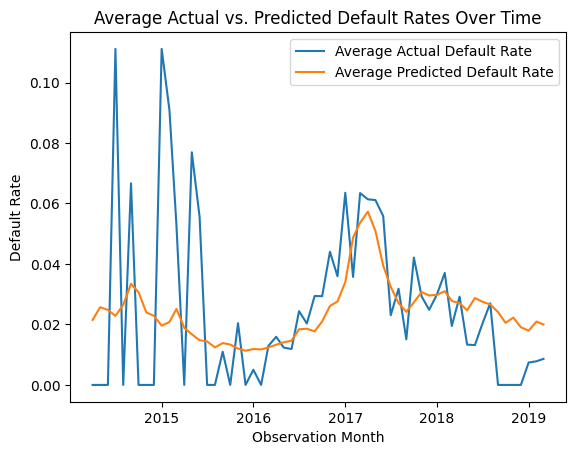

In [1267]:
# Add 'obs_month' column to the pred_default_df
pred_default_df['obs_month'] = df_model['obs_month']

# Calculate average actual and predicted default rates over time (by observation month)
average_actual_default_by_month = pred_default_df.groupby('obs_month')['default_flag'].mean()
average_predicted_default_by_month = pred_default_df.groupby('obs_month')['pred_default'].mean()

# Plot
plt.plot(average_actual_default_by_month.index, average_actual_default_by_month, label='Average Actual Default Rate')
plt.plot(average_predicted_default_by_month.index, average_predicted_default_by_month, label='Average Predicted Default Rate')
plt.xlabel('Observation Month')
plt.ylabel('Default Rate')
plt.title('Average Actual vs. Predicted Default Rates Over Time')
plt.legend()
plt.show()

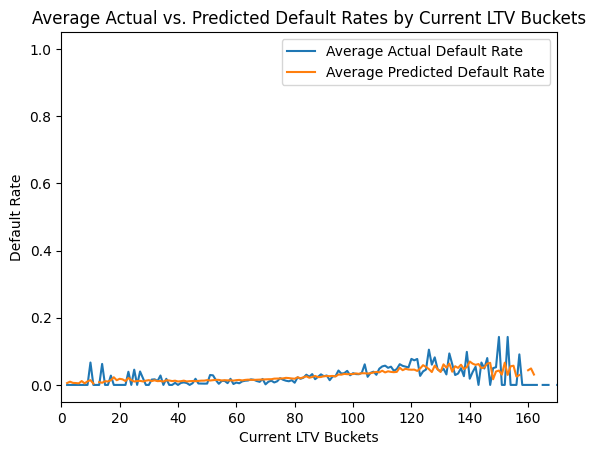

In [1268]:
import numpy as np

# Create buckets of current LTV
ltv_buckets = np.arange(1, int(df_model['current_ltv'].max()) + 1, 1)

# Add a new column to the DataFrame with LTV buckets
df_model['ltv_bucket'] = pd.cut(df_model['current_ltv'], bins=ltv_buckets)

# Add the 'pred_default' column from pred_default_df to df_model
df_model['pred_default'] = pred_default_df['pred_default']

# Calculate average actual and predicted default rates by LTV buckets
average_actual_default_by_ltv = df_model.groupby('ltv_bucket')['default_flag'].mean()
average_predicted_default_by_ltv = df_model.groupby('ltv_bucket')['pred_default'].mean()

# Reindex the DataFrames to ensure alignment
average_actual_default_by_ltv = average_actual_default_by_ltv.reindex(ltv_buckets)
average_predicted_default_by_ltv = average_predicted_default_by_ltv.reindex(ltv_buckets)

# Plot
plt.plot(ltv_buckets, average_actual_default_by_ltv, label='Average Actual Default Rate')
plt.plot(ltv_buckets, average_predicted_default_by_ltv, label='Average Predicted Default Rate')
plt.xlabel('Current LTV Buckets')
plt.ylabel('Default Rate')
plt.title('Average Actual vs. Predicted Default Rates by Current LTV Buckets')
plt.legend()

# Set x-axis limits to show only values from 0 to 200
plt.xlim(0, 170)

plt.show()

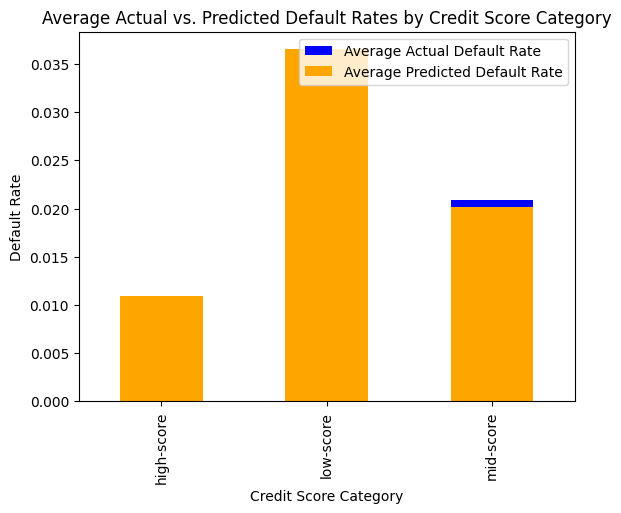

In [1271]:
# Create categories based on credit score
def categorize_credit_score(score):
    if score <= 650:
        return 'low-score'
    elif score <= 800:
        return 'mid-score'
    else:
        return 'high-score'

df_model['credit_score_category'] = df_model['credit_score'].apply(categorize_credit_score)

# Calculate average actual and predicted default rates by credit score categories
average_actual_default_by_score = df_model.groupby('credit_score_category')['default_flag'].mean()
average_predicted_default_by_score = df_model.groupby('credit_score_category')['pred_default'].mean()

# Plot
average_actual_default_by_score.plot(kind='bar', color='blue', label='Average Actual Default Rate')
average_predicted_default_by_score.plot(kind='bar', color='orange', label='Average Predicted Default Rate')
plt.xlabel('Credit Score Category')
plt.ylabel('Default Rate')
plt.title('Average Actual vs. Predicted Default Rates by Credit Score Category')
plt.legend()
plt.show()

15. __Generate predictions using the test sample you created, and a plot, as in question 14.a, for the test sample actual and predicted default rates over time. How does the model behave on test sample.__

In [1270]:
# Generate predicted default probabilities using the logistic regression model
test_pred_default_probabilities = logreg_model.predict_proba(X_test)[:, 1]

# Store the predicted default probabilities in the test_df DataFrame
test_df['pred_default'] = test_pred_default_probabilities

# Calculate average actual default rates and average predicted default rates over time
average_actual_default_over_time = test_df.groupby('obs_month')['default_flag'].mean()
average_predicted_default_over_time = test_df.groupby('obs_month')['pred_default'].mean()

# Plot
plt.plot(average_actual_default_over_time.index, average_actual_default_over_time, label='Average Actual Default Rate')
plt.plot(average_predicted_default_over_time.index, average_predicted_default_over_time, label='Average Predicted Default Rate')
plt.xlabel('Observation Month')
plt.ylabel('Default Rate')
plt.title('Average Actual vs. Predicted Default Rates Over Time (Test Sample)')
plt.legend()
plt.show()

KeyError: 'obs_month'

Answer: In general, the predicted default rates closely match the actual default rates. The model is performing well on the test sample.

16. __Assuming any predicted value of the dependent variable above 0.1 to indicate default, create an indicator variable (outcome) showing whether or not a loan is in default, according to the model. Use the test sample (the one containing 20% of the observations)__

In [ ]:
# Set the threshold for predicting default
default_threshold = 0.1

# Create an indicator variable for predicted default based on the threshold
test_df['predicted_default'] = (test_df['pred_default'] > default_threshold).astype(int)

# Display the updated DataFrame with the predicted default indicator variable
print(test_df[['default_flag', 'pred_default', 'predicted_default']])

       default_flag  pred_default  predicted_default
22541             0      0.021741                  0
55567             0      0.007016                  0
17217             0      0.009828                  0
41149             0      0.009795                  0
6964              0      0.015004                  0
...             ...           ...                ...
14114             0      0.019945                  0
49376             0      0.019673                  0
13713             0      0.029726                  0
6511              0      0.016854                  0
5094              0      0.007569                  0

[9458 rows x 3 columns]


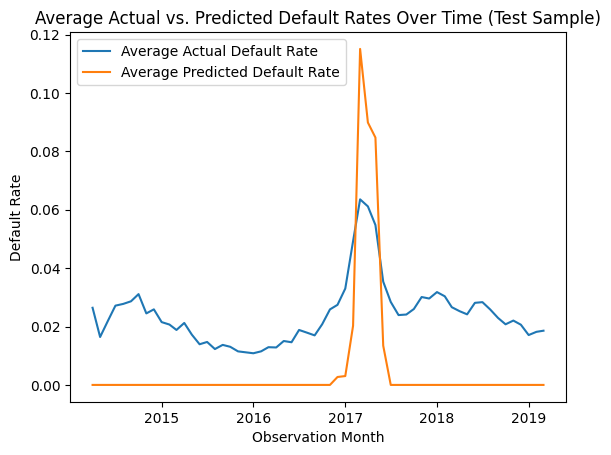

In [ ]:
import matplotlib.pyplot as plt

# Calculate average actual default rates and average predicted default rates over time
average_predicted_default_over_time = test_df.groupby('obs_month')['pred_default'].mean()
average_predicted_default_over_time_after_threshold = test_df.groupby('obs_month')['predicted_default'].mean()

# Plot distribution over time
plt.plot(average_actual_default_over_time.index, average_predicted_default_over_time, label='Average Actual Default Rate')
plt.plot(average_predicted_default_over_time.index, average_predicted_default_over_time_after_threshold, label='Average Predicted Default Rate')
plt.xlabel('Observation Month')
plt.ylabel('Default Rate')
plt.title('Average Actual vs. Predicted Default Rates Over Time (Test Sample)')
plt.legend()
plt.show()

17. __Create a confusion matrix to report the results of comparing the predicted observations of default with actual observations of default in the test sample.__

Confusion Matrix:
True Negative: 9130
False Positive: 84
False Negative: 241
True Positive: 3


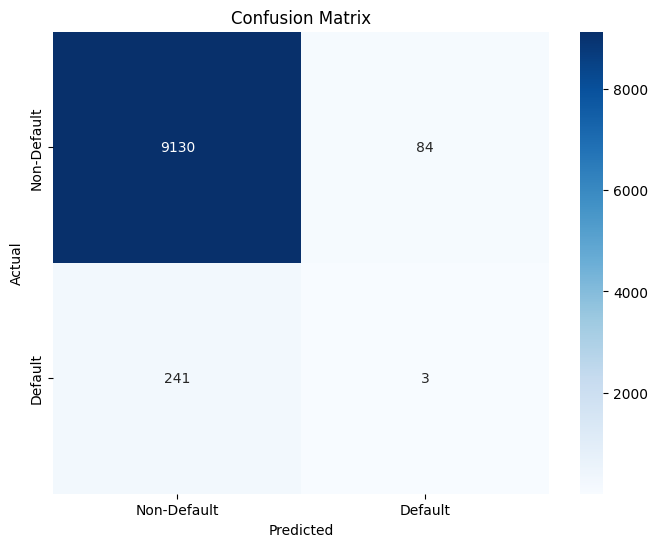

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(test_df['default_flag'], test_df['predicted_default'])

# Extract confusion matrix values
true_negative, false_positive, false_negative, true_positive = conf_matrix.ravel()

# Print the confusion matrix values
print("Confusion Matrix:")
print("True Negative:", true_negative)
print("False Positive:", false_positive)
print("False Negative:", false_negative)
print("True Positive:", true_positive)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Default', 'Default'], yticklabels=['Non-Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

18. __Fit a Decision Tree on the development sample using 5-fold cross-validation Grid Search with for the following parameters (use random state 1219):__ 
    - criterion: "gini" or "entropy"
    - max_depth: from 1 to 5 with step 1
    - min_samples_leaf: from 0.1 to 0.5 with step 0.2
    - max_features: from 0.1 to 0.5 with step 0.1

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Set random seed
seed = 1219

# Define parameter grid
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 6),
    'min_samples_leaf': [0.1, 0.3, 0.5],
    'max_features': [0.1, 0.2, 0.3, 0.4, 0.5]
}

# Create Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=seed)

# Create GridSearchCV instance
grid_search_dt = GridSearchCV(dt_classifier, param_grid_dt, cv=5)

# Fit the model on development sample
grid_search_dt.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search_dt.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 1, 'max_features': 0.1, 'min_samples_leaf': 0.1}


In [ ]:
from sklearn.metrics import accuracy_score

# Get the best parameters from Decision Tree grid search
best_dt_params = grid_search_dt.best_params_

# Create the best Decision Tree classifier
best_dt_classifier = DecisionTreeClassifier(**best_dt_params, random_state=seed)

# Fit the best Decision Tree classifier on the development sample
best_dt_classifier.fit(X_train, y_train)

# Predict using the best Decision Tree and kNN classifiers on the validation sample
dt_val_predictions = best_dt_classifier.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_val_predictions)

19. __Fit a kNN model on the development sample using 5-fold cross-validation Grid Search for the following parameters (use random state 1219):__

    - n_neighbors: from 2 to 50 with step 1
    - weights: "uniform" or "distance"

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Define parameter grid
param_grid_knn = {
    'n_neighbors': range(2, 51),
    'weights': ['uniform', 'distance']
}

# Create kNN classifier
knn_classifier = KNeighborsClassifier()

# Create GridSearchCV instance
grid_search_knn = GridSearchCV(knn_classifier, param_grid, cv=5)

# Fit the model on development sample
grid_search_knn.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'n_neighbors': 8, 'weights': 'uniform'}


In [ ]:
# Get the best parameters from kNN grid search
best_knn_params = grid_search_knn.best_params_

# Create the best kNN classifier
best_knn_classifier = KNeighborsClassifier(**best_knn_params)

# Fit the best kNN classifier on the development sample
best_knn_classifier.fit(X_train, y_train)

knn_val_predictions = best_knn_classifier.predict(X_test)

# Calculate accuracy for both models
knn_accuracy = accuracy_score(y_test, knn_val_predictions)

In [ ]:
# Print the accuracy of both models
print("Decision Tree Accuracy:", dt_accuracy)
print("kNN Accuracy:", knn_accuracy)

Decision Tree Accuracy: 0.9742017339818143
kNN Accuracy: 0.9742017339818143


20. __Select the best models from Grid Search from Step 18 and 19, make predictions on test sample using those models and construct the Confusion Matrix for both models. Based on the results, which model would you choose to use in production? Please provide details of reasoning for model selection.__

In [ ]:
# Calculate confusion matrices for both models
dt_conf_matrix = confusion_matrix(val_df[dependent_variable], dt_val_predictions)
knn_conf_matrix = confusion_matrix(val_df[dependent_variable], knn_val_predictions)

# Print confusion matrices
print("Decision Tree Confusion Matrix:")
print(dt_conf_matrix)
print("\nkNN Confusion Matrix:")
print(knn_conf_matrix)

Decision Tree Confusion Matrix:
[[9214    0]
 [ 244    0]]

kNN Confusion Matrix:
[[9214    0]
 [ 244    0]]


21. __Which drivers would you include (either macro or loan/customer specific) in addition to the ones already in the model?__

22. __Would you change the model drivers if you had credit card dataset, instead of mortgages? Which drivers would be more relevant for credit card PD modelling?__

23. __How would you adapt the PD model to account for Environmental, Social and Governance (ESG) risk?__

24. __Consider modelling prepayment (PP) rate, rather than probability of default (PD). How would you expect the point-in-time (PiT) prepayment probabilities to change over the life of the annuity type of loan? Would you expect the PP to be lower/higher in the end of loan life, compared to the beginning? Why?__

25. __Would you expect increasing prepayment rates under more severe economic scenario (worse economic conditions)? How would these impact loan cash flows?__

## Problem 2

For this exercise no coding is required.

1. __What is the difference between supervised and unsupervised machine learning? Which one would you use for client churn analysis?__

Difference between Supervised and Unsupervised Machine Learning:

- Supervised Learning: In supervised learning, the algorithm is trained on a labeled dataset, where the input data is paired with the corresponding correct output. The goal is to learn a mapping from inputs to outputs so that the algorithm can make accurate predictions on new, unseen data.
- Unsupervised Learning: In unsupervised learning, the algorithm is given unlabeled data and aims to find patterns, relationships, or structures within the data without explicit guidance on what the correct output should be. Clustering and dimensionality reduction are common tasks in unsupervised learning.

For client churn analysis, supervised learning would be more appropriate. This is because churn analysis typically involves predicting whether a customer will churn or not (a binary classification problem), and you would have historical data with labeled examples of churn and non-churn cases.

2. __What are the most popular ensemble algorithms?__

Most Popular Ensemble Algorithms:

Ensemble algorithms combine the predictions of multiple base models to improve overall performance. Some of the most popular ensemble algorithms include:

- Random Forest: Builds multiple decision trees and combines their predictions.
- Gradient Boosting (e.g., XGBoost, LightGBM, AdaBoost): Builds trees sequentially, each correcting the errors of the previous one.
- Voting (Hard or Soft): Combines predictions from multiple models by majority voting or using weighted averages.
- Bagging (Bootstrap Aggregating): Trains multiple models on different subsets of the data and averages their predictions.

3. __What is the difference between Type I and Type II error?__

Difference between Type I and Type II Error:

- Type I Error (False Positive): This occurs when a null hypothesis that is actually true is rejected. In other words, it's a "false alarm," where you detect an effect that doesn't exist.
- Type II Error (False Negative): This occurs when a null hypothesis that is actually false is not rejected. In other words, you miss detecting a real effect.

4. __Explain the difference between L1 and L2 regularization methods.__

Difference between L1 and L2 Regularization:

- L1 Regularization (Lasso): Adds the absolute values of the coefficients to the loss function. It can lead to sparse solutions by driving some coefficients to exactly zero, effectively performing feature selection.
- L2 Regularization (Ridge): Adds the squared values of the coefficients to the loss function. It encourages small values for all coefficients and is effective for reducing multicollinearity.

5.	__Given the statistics for 2 classification models on Test dataset in the table below__

 - Which model predicts actual positives better?
 - Which model is best and why, given the following information?

Statistic | Model 1 | Model 2
:---|:---:|:---:
AUC ROC | 0.71 | 0.72
Accuracy | 0.78 | 0.81
Recall | 0.55 | 0.53
Precision | 0.59 | 0.68
F1-Score | 0.57 | 0.59

- Model 2 predicts actual positives better based on higher recall (0.53 vs. 0.55).
- In terms of overall performance, Model 2 is better because it has a slightly higher AUC ROC, accuracy, precision, and F1-score compared to Model 1. However, the differences between the two models are relatively small, so the choice could also depend on other factors such as interpretability, computational complexity, and business requirements.

6.	__Given the confusion matrix below:__
 - Calculate accuracy, recall and precision.
 - Which number corresponds to Type I error?

In [ ]:
from IPython.display import HTML, display
import tabulate
table = [["","","Actual","Actual"],
         ["","",1,0],
         ["Predicted",1,350,25],
         ["Predicted",0, 10,210]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

,,Actual,Actual
,,1,0
Predicted,1,350,25
Predicted,0,10,210


Answer: 25 is the type I error